# Model for State wise  Analysis

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def pre(total_pop):
    temp=[]
    for i in total_pop:
        k=str(i).split(',')
        x=""
        for j in k:
            x+=j
        temp.append(int(x))
    return temp

## Data uploading

In [161]:
df=pd.read_csv("state_pop.csv")
df2=pd.read_csv("percapita.csv")

In [162]:
df.sort_values("S. No.",inplace=True,ascending=True,kind='quicksort')
df.head()

,States,three_lpa_pop,ten_lpa_pop,tenPlus_pop,S. No.
1,Andhra Pradesh (AP),"18,959,462","885,993","195,535",1
2,Arunachal Pradesh,"227,690","10,463","2,297",2
3,Assam,"5,447,201","226,697","30,217",3
4,Bihar (BI),"16,883,440","258,752","34,447",4
6,Chhattisgarh (CH),"4,267,675","186,996","36,386",5


In [158]:
df2.head()

,S. No.,State/UT,Per Capita Income
0,1,Andhra Pradesh,93699
1,2,Arunachal Pradesh,103633
2,3,Assam,54618
3,4,Bihar,31380
4,5,Chhattisgarh,78001


In [163]:
middle_pop=pre(df["ten_lpa_pop"].values)
upper_pop=pre(df["tenPlus_pop"].values)
total=[]
for i in range(len(middle_pop)):
    total.append(int(middle_pop[i])+int(upper_pop[i]))
total[:32]     #total population that can bear byuing

[1081528,
 12760,
 256914,
 293199,
 223382,
 70926,
 1151764,
 645855,
 135016,
 168190,
 255353,
 861102,
 764314,
 539587,
 2398726,
 19208,
 31335,
 21441,
 52968,
 287707,
 712538,
 719744,
 8916,
 1128636,
 26800,
 1553337,
 129585,
 1113204,
 11757,
 63695,
 643463,
 32033]

In [164]:
per_capita=df2["Per Capita Income"].values

## Commodity Data

In [165]:
df=pd.read_csv("flipkart_com-ecommerce_sample.csv")


In [8]:
uid=df["uniq_id"].values
p_name=df["product_name"].values
price=df["retail_price"].values
d_price=df["discounted_price"].values
brand=df["brand"].values


In [9]:
import math
brand1=[]
for i in range(len(brand)):
    k=p_name[i].split()
    try: 
        if(math.isnan(brand[i])):
            brand1.append(k[0])
    except:
        brand1.append(brand[i])

In [10]:
csv=pd.DataFrame({"uniq_id":uid,"product_name":p_name,"retail_price":price,"discounted_price":d_price,"brand":brand1})

In [11]:
csv.to_csv("dataset.csv")

In [12]:
csv["retail_price"]=csv["retail_price"].fillna(csv["retail_price"].median())

In [13]:
csv["discounted_price"]=csv["discounted_price"].fillna(csv["discounted_price"].median())

In [14]:
csv.to_csv("dataset.csv")

In [15]:
discounted_price=csv["discounted_price"].values
retail_price=csv["retail_price"].values
uid=csv["uniq_id"].values

In [16]:
"""input_vector=[]
for i in range(0,int(len(uid)//2)):
    l=[]
    for j in range(len(total)):
        l.append([[retail_price[i]],[total[j]],[per_capita[j]]])
    input_vector.append(l)
test_input_vector=[]
for i in range(len(uid)//2,len(uid)):
    l=[]
    for j in range(len(total)):
        l.append([[retail_price[i]],[total[j]],[per_capita[j]]])
    test_input_vector.append(l)
"""
input_vector=[]
for i in range(0,len(uid)):
    for j in range(len(total)):
        input_vector.append([retail_price[i],total[j],per_capita[j]])
len(input_vector[0])

3

In [17]:
"""label=[]
for i in range(len(discounted_price)):
    l=[]
    for j in range(len(total)):
        l.append([discounted_price[i] *100 /per_capita[j]])
    label.append(l)
len(label[0])
"""
label=[]
for i in range(len(discounted_price)):
    label.append(discounted_price[i])
label


[379.0,
 22646.0,
 499.0,
 267.0,
 210.0,
 430.0,
 479.0,
 22646.0,
 349.0,
 479.0,
 950.0,
 910.0,
 550.0,
 379.0,
 699.0,
 379.0,
 22646.0,
 449.0,
 999.0,
 22646.0,
 100.0,
 550.0,
 1039.0,
 1500.0,
 190.0,
 699.0,
 2499.0,
 390.0,
 309.0,
 1699.0,
 579.0,
 699.0,
 275.0,
 275.0,
 837.0,
 699.0,
 298.0,
 899.0,
 399.0,
 764.0,
 1349.0,
 1499.0,
 1899.0,
 1400.0,
 499.0,
 449.0,
 1049.0,
 5000.0,
 4990.0,
 599.0,
 449.0,
 899.0,
 4990.0,
 449.0,
 6600.0,
 449.0,
 449.0,
 599.0,
 550.0,
 699.0,
 499.0,
 849.0,
 599.0,
 449.0,
 449.0,
 924.0,
 499.0,
 395.0,
 795.0,
 250.0,
 695.0,
 899.0,
 1393.0,
 230.0,
 449.0,
 395.0,
 550.0,
 1299.0,
 380.0,
 899.0,
 698.0,
 650.0,
 698.0,
 499.0,
 1200.0,
 949.0,
 590.0,
 599.0,
 15195.0,
 1995.0,
 13099.0,
 1223.0,
 24400.0,
 595.0,
 449.0,
 2599.0,
 2250.0,
 849.0,
 719.0,
 1202.0,
 399.0,
 999.0,
 2099.0,
 399.0,
 2795.0,
 1249.0,
 4995.0,
 2299.0,
 107750.0,
 3146.0,
 1270.0,
 1817.0,
 1919.0,
 3221.0,
 429.0,
 3995.0,
 571230.0,
 899.0,
 499

# Multi-layer Perceptron regressor

In [18]:
from sklearn.neural_network import MLPRegressor

In [114]:
clf = MLPRegressor(solver='adam', alpha=0.0001,hidden_layer_sizes=(5, 3), random_state=0, learning_rate="constant", learning_rate_init=0.06,activation="relu")

In [115]:
clf.fit(input_vector[0:len(label)//2],label[0:len(label)//2])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3), learning_rate='constant',
       learning_rate_init=0.06, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [146]:
k=clf.predict(input_vector[:1000])

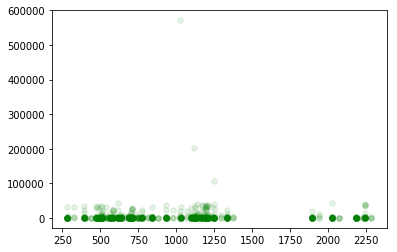

In [157]:
plt.scatter(k,label[:1000], c="green",s=30, alpha=0.1,label=("predicted","actual"))
plt.show()